<a href="https://colab.research.google.com/github/njafarov/Optimization_LP/blob/main/Network_Problem_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyomo
!apt-get install -y -qq glpk-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.7 MB 5.1 MB/s 
     |████████████████████████████████| 49 kB 5.3 MB/s 
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 123942 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.1.2-2_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_4.65-1_amd64.deb ...
Unpacking libglpk40:amd64 (4.65-1) ...
Selecting previously unselected package glpk-utils.
Pr

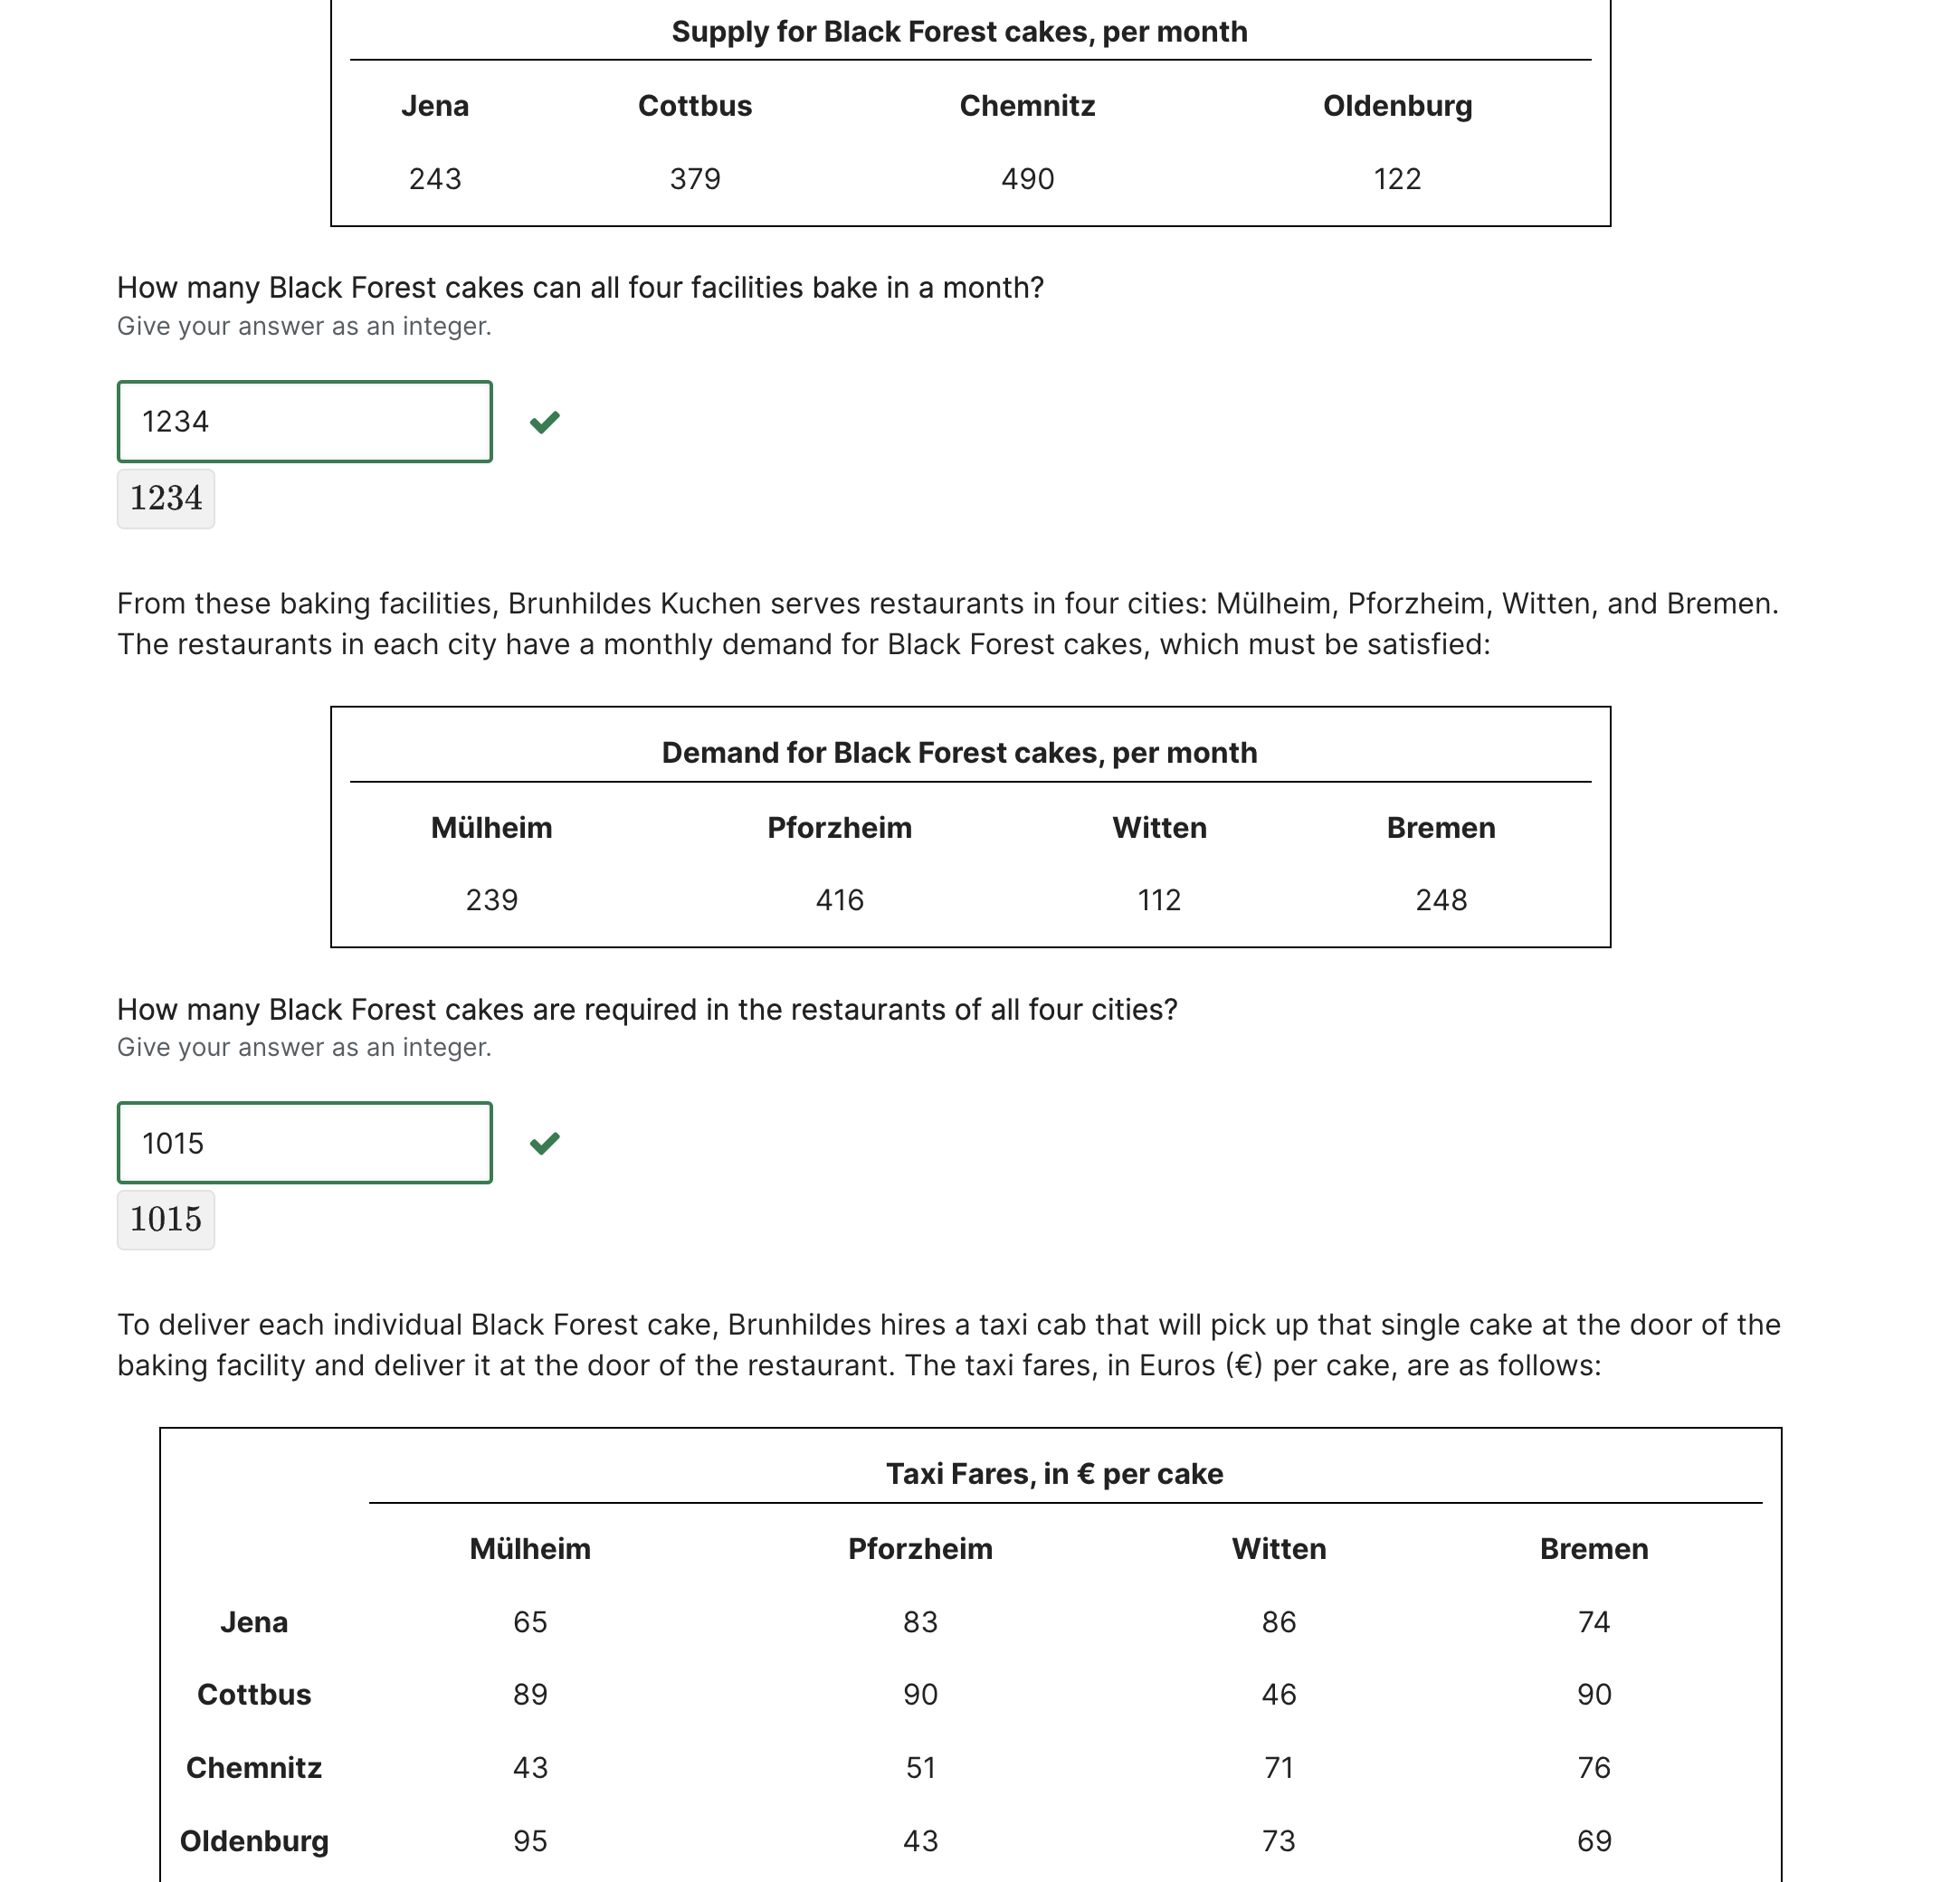

In [2]:
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

In [19]:
# Define the model
model = pyo.ConcreteModel()

model.i = pyo.Set(initialize=["Jena",	"Cottbus",	"Chemnitz",	"Oldenburg"])
model.j = pyo.Set(initialize=["Mülheim",	"Pforzheim",	"Witten",	"Bremen"])



model.C = pyo.Param(model.i, model.j, initialize={("Jena","Mülheim"):65,("Jena","Pforzheim"):83,("Jena","Witten"):86,("Jena","Bremen"):74,
                                                  ("Cottbus","Mülheim"):89,("Cottbus","Pforzheim"):90,("Cottbus","Witten"):46,("Cottbus","Bremen"):90,
                                                  ("Chemnitz","Mülheim"):43,("Chemnitz","Pforzheim"):51,("Chemnitz","Witten"):71,("Chemnitz","Bremen"):76,
                                                  ("Oldenburg","Mülheim"):95,("Oldenburg","Pforzheim"):43,("Oldenburg","Witten"):73,("Oldenburg","Bremen"):69})
C = model.C #Taxi Fares,in € percake

model.S = pyo.Param(model.i, initialize={"Jena":243,	"Cottbus":379,	"Chemnitz":490,	"Oldenburg":122})
S = model.S # Supply from each city

model.D = pyo.Param(model.j, initialize={"Mülheim":239,	"Pforzheim":416,	"Witten":112,	"Bremen":248})
D = model.D #Demand of each city

# Decision Variables
model.x = pyo.Var(model.i, model.j, domain=pyo.NonNegativeIntegers)
x = model.x

# Objective Function
def objective_function(model):
  return sum(sum(x[i,j]*C[i,j] for i in model.i) for j in model.j)
model.Obj = pyo.Objective(rule=objective_function, sense=pyo.minimize)


# Constrains

def cons1(model,i):
  return sum(x[i,j] for j in model.j)<=S[i]
model.cons1 = pyo.Constraint(model.i, rule=cons1)

def cons2(model,j):
  return sum(x[i,j] for i in model.i)>=D[j]
model.cons2 = pyo.Constraint(model.j, rule=cons2)

# Optimization
Solver = SolverFactory('glpk')
results = Solver.solve(model)

print(results)
print("Objective function: ", model.Obj())
for i in model.i:
  for j in model.j:
    print("From ", i, "to ",j,"---> ", x[i,j]())


Problem: 
- Name: unknown
  Lower bound: 55735.0
  Upper bound: 55735.0
  Number of objectives: 1
  Number of constraints: 9
  Number of variables: 17
  Number of nonzeros: 33
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 1
      Number of created subproblems: 1
  Error rc: 0
  Time: 0.013590574264526367
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

Objective function:  55735.0
From  Jena to  Mülheim --->  43.0
From  Jena to  Pforzheim --->  0.0
From  Jena to  Witten --->  0.0
From  Jena to  Bremen --->  200.0
From  Cottbus to  Mülheim --->  0.0
From  Cottbus to  Pforzheim --->  0.0
From  Cottbus to  Witten --->  112.0
From  Cottbus to  Bremen --->  48.0
From  Chemnitz to  Mülheim --->  196.0
From  Chemnitz to  Pforzheim --->  294.0
From  Chemnitz to  Witten --->  0.0
From  Chemnitz to  Bremen --->  0.0
From  Oldenburg to  Mülheim --->  0.0
From  Oldenburg to